# Project: Wrangling and Analyze Data

## Data Gathering
For this first section, we have three different data on WeRateDogs Twitter Handle to work with for our analysis and they shall be gathered with the necessary libraries.

In [1]:
# importing the required libraries for our analysis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
import tweepy
import os
from PIL import Image
from io import BytesIO

1. Directly downloading the provided WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# reading the downloaded WeRateDogs Twitter archive data
t_arch = pd.read_csv("twitter-archive-enhanced.csv")

2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# downloading the tweet image prediction using Requests library
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# opening and downloading the response content
with open("tweet_image_predictions.tsv", mode = 'wb') as file:
    file.write(response.content)
    
# reading the downloaded tsv file
t_image=pd.read_csv("tweet_image_predictions.tsv", sep="\t")

3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
from tweepy import OAuthHandler

from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# If the necessary file does not exist, save each tweet's returned JSON as a new line in a .txt file
if not os.path.exists('tweet_json.txt'):
    with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass

end = timer()
print(end - start)
print(fails_dict)

0.0006094790005590767
{}


In [6]:
# reading the additional data from Twitter API
df_list = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweets = json.loads(line)
        tweet_id = tweets['id']
        retweet = tweets['retweet_count']
        favorite = tweets['favorite_count']
        followers = tweets['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count':retweet,
                       'favorite_count':favorite,
                       'followers_count': followers})
addtweet = pd.DataFrame(df_list, columns=['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])

## Assessing Data
In this section, we use both visual assessment and programmatic assessement to assess the data gathered.


#### WeRateDogs Twitter Archive

In [7]:
# Ramdomly looking into WeRateDogs Twitter archive data
t_arch.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1831,676215927814406144,NaN,NaN,2015-12-14 01:43:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Herm. He just wants to be like the oth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676215927...,9,10,Herm,None,None,None,None
791,773704687002451968,NaN,NaN,2016-09-08 02:09:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Loki. He knows he's adorable. One ear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773704687...,12,10,Loki,None,None,None,None
1270,709449600415961088,NaN,NaN,2016-03-14 18:42:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Karma. She's just a head. Lost body durin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709449600...,10,10,Karma,None,None,None,None
2130,670093938074779648,NaN,NaN,2015-11-27 04:16:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wally. He's a Flaccid Mitochondria. Go...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670093938...,9,10,Wally,None,None,None,None
473,816336735214911488,NaN,NaN,2017-01-03 17:33:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dudley. He found a flower and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/816336735...,11,10,Dudley,None,None,None,None
1195,717421804990701568,NaN,NaN,2016-04-05 18:41:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ebby. She's a Zimbabwean Feta. Embarra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717421804...,9,10,Ebby,None,None,None,None
20,888078434458587136,NaN,NaN,2017-07-20 16:49:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gerald. He was just told he didn't get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888078434...,12,10,Gerald,None,None,None,None
2026,671879137494245376,NaN,NaN,2015-12-02 02:30:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brad. He's a chubby lil pup. Doesn't r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671879137...,5,10,Brad,None,None,None,None
739,780601303617732608,NaN,NaN,2016-09-27 02:53:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Hercules. He can have whatever he wants f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780601303...,12,10,Hercules,None,None,None,None
1149,726828223124897792,NaN,NaN,2016-05-01 17:38:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bloop. He's a Phoenician Winnebago. To...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/726828223...,12,10,Bloop,None,None,None,None


In [8]:
# Ascertaining the number of rows and columns in the dataset
t_arch.shape

(2356, 17)

In [9]:
# Getting necessary info regarding the data
t_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**Observation:**
Erroneous datatype (column: timestamp and retweeted_status_timestamp), should have been datetime

In [10]:
# Checking the ratings column
t_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

**Observation:**
Some rating numerators are too high

In [11]:
# Checking the ratings column
t_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

**Observation:**
Some rating denominators also very high

In [12]:
# Checking if some ratings are from retweets
t_arch[t_arch['retweeted_status_user_id'].isnull() == False][:5]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None


**Observation:** Checking the 'text' column above, it's evident that there are ratings from retweets as the texts are preceded with 'RT' and we only need ratings from Tweets only.

In [13]:
# Confirming those ratings that are not from retweets
t_arch[t_arch['retweeted_status_user_id'].isnull() == True][:5]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Observation:** 'RT' is not preceding any of the texts above indicating they are not from retweets

In [14]:
# Checking if some ratings are from replies
t_arch[t_arch['in_reply_to_status_id'].isnull() == False][:4]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


**Observation:** This shows that some ratings are from replies else the 'text' column wouldn't be having '@'+reference_name

In [15]:
t_arch[t_arch['in_reply_to_user_id'].isnull() == False].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 30 to 2298
Data columns (total 17 columns):
tweet_id                      78 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     78 non-null object
source                        78 non-null object
text                          78 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 23 non-null object
rating_numerator              78 non-null int64
rating_denominator            78 non-null int64
name                          78 non-null object
doggo                         78 non-null object
floofer                       78 non-null object
pupper                        78 non-null object
puppo                         78 non-null object
dtypes: float64(4), int64(3), object(10)
memory usage: 11.0+ KB

In [16]:
t_arch[t_arch[['doggo', 'floofer', 'pupper', 'puppo']].values != 'None'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 9 to 2017
Data columns (total 17 columns):
tweet_id                      394 non-null int64
in_reply_to_status_id         9 non-null float64
in_reply_to_user_id           9 non-null float64
timestamp                     394 non-null object
source                        394 non-null object
text                          394 non-null object
retweeted_status_id           38 non-null float64
retweeted_status_user_id      38 non-null float64
retweeted_status_timestamp    38 non-null object
expanded_urls                 388 non-null object
rating_numerator              394 non-null int64
rating_denominator            394 non-null int64
name                          394 non-null object
doggo                         394 non-null object
floofer                       394 non-null object
pupper                        394 non-null object
puppo                         394 non-null object
dtypes: float64(4), int64(3), object(10)
memory us

#### Tweet Image Prediction

In [17]:
# Assessing the Tweet Image Prediction data
t_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
# Checking the info on the dataset
t_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Observation:** From the table, the columns p1, p2 and p3 are not consisted case-wise and twitter_id will rather be preferred in object datatype

#### Additional Data via The Twitter API 

In [19]:
# Checking the additional data
addtweet.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,7009,33815,9285904
1,892177421306343426,5302,29332,9285904
2,891815181378084864,3481,22058,9285904
3,891689557279858688,7227,36941,9285904
4,891327558926688256,7762,35311,9285904


In [20]:
# info on the data
addtweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
tweet_id           2327 non-null int64
retweet_count      2327 non-null int64
favorite_count     2327 non-null int64
followers_count    2327 non-null int64
dtypes: int64(4)
memory usage: 72.8 KB


**Observation:** Tweet_id should be object datatype as for other tables too

### Quality issues
#### Twitter-archive-enhanced table (t_arch)
1. Erroneous datatype (column: timestamp and retweeted_status_timestamp)

2. Some numerators ratings are more than expected 

3. Some denominators are not 10.

4. Some ratings are not tweets but retweets so remove them

5. Some ratings are not tweets but replies so remove them

6.  The columns retweeted_status_user_id, retweeted_status_user, in_reply_to_status_id are not relevant

#### Tweet_image_predictions table (t_image)
 
7. The 'tweet_id' column should not be integer but string/object

8. The predicted names of the dogs are not consisted case-wise under the columns p1, p2 and p3.

### Tidiness issues
9. Melt the last 4 columns in twitter archive data into one column

10. Different tables for the same observations so we merge

## Cleaning Data
In this section, we clean **all** of the issues we documented while assessing. 

In [21]:
# Make copies of original pieces of data
TarchClean = t_arch.copy()
AddtweetClean = addtweet.copy() 
TimageClean = t_image.copy()

### Issue #1:

#### Define
- Erroneous datatype (column: timestamp and retweeted_status_timestamp)

#### Code

In [22]:
# changing the datatype for timestamp and retweeted_status_timestamp
TarchClean.timestamp=pd.to_datetime(TarchClean.timestamp)
TarchClean.retweeted_status_timestamp=pd.to_datetime(TarchClean.retweeted_status_timestamp)

#### Test

In [23]:
TarchClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

### Issue #2:

#### Define:
- Some numerators ratings are more than expected

#### Code

In [24]:
# checking for the number of outliers in our observation
print(TarchClean[TarchClean.rating_numerator > 15].count()[0]) 

# dropping the outliers
TarchClean = TarchClean.drop(TarchClean[TarchClean['rating_numerator'] > 15].index)


26


#### Test

In [25]:
TarchClean[TarchClean['rating_numerator'] > 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3:

#### Define:
- Some denominators are not 10.

#### Code

In [26]:
# checking for the number of outliers in our observation
print(TarchClean[TarchClean.rating_denominator != 10].count()[0]) 

# dropping the outliers
TarchClean = TarchClean.drop(TarchClean[TarchClean['rating_denominator'] != 10].index)


7


In [27]:
# extracting just the url from the source column
TarchClean.source=TarchClean.source.str[9:43]

#### Test

In [28]:
TarchClean[TarchClean.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #4:

#### Define
- Some ratings are not from tweets but retweets so remove them

#### Code

In [29]:
# checking for the rows having retweets ratings
print(TarchClean[TarchClean['retweeted_status_user_id'].isnull() == False]['tweet_id'].count())

#dropping the rows affected
TarchClean = TarchClean.drop(TarchClean[TarchClean['retweeted_status_user_id'].isnull() == False].index)


179


#### Test

In [30]:
# confirming if they've been dropped
TarchClean[TarchClean['retweeted_status_user_id'].isnull() == False].count()[0]

0

### Issue #5:

#### Define
- Some ratings are not from tweets but replies so remove them

#### Code

In [31]:
# checking for the rows having replies ratings
print(TarchClean[TarchClean['in_reply_to_user_id'].isnull() == False]['tweet_id'].count())

# dropping the rows affected
TarchClean = TarchClean.drop(TarchClean[TarchClean['in_reply_to_user_id'].isnull() == False].index)


69


#### Test

In [32]:
# confirming if they've been dropped
TarchClean[TarchClean['in_reply_to_user_id'].isnull() == False].count()[0]

0

### Issue #6:

#### Define
- The columns retweeted_status_user_id, retweeted_status_user, in_reply_to_status_id are not relevant anymore

#### Code

In [33]:
# removing retweeted_status_user_id, retweeted_status_user, in_reply_to_status_id and in_reply_to_user_id
TarchClean.drop(columns=['retweeted_status_user_id', 'retweeted_status_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_timestamp'], inplace=True)

#### Test

In [34]:
# Ascertaining if the columns are still present or gone
TarchClean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #7:

#### Define
- Erroneous datatype (column: tweet_id)

#### Code

In [35]:
#The 'tweet_id' column should not be integer but string/object for all the tables
TimageClean.tweet_id=TimageClean.tweet_id.astype('str')

TarchClean.tweet_id=TarchClean.tweet_id.astype('str')
AddtweetClean.tweet_id=AddtweetClean.tweet_id.astype('str')

#### Test

In [36]:
TimageClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #8:

#### Define
- The predicted names of the dogs are not consisted case-wise. Some names started with Capital letters while others with small letters under the columns p1, p2 and p3.

#### Code

In [37]:
# changing the columns to lowercase
Ps = ['p1','p2','p3']
for p in Ps:
    TimageClean[p]=TimageClean[p].apply(lambda x: x.lower())
    p

#### Test

In [38]:
TimageClean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #9:

#### Define
- Melt the last 4 columns into one column named dog_stages


#### Code

In [39]:
# replacing the string None to NaN to ease concatenation
TarchClean[['doggo', 'floofer', 'pupper', 'puppo']]=TarchClean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', np.nan)

# melting the last four columns into dog_stages to tidy the table
TarchClean = pd.melt(TarchClean, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name'], value_vars= ['doggo', 'floofer',
       'pupper', 'puppo'], var_name='dog_stages1', value_name='dog_stages')

# dropping the var_name(dog_stages1) because we do not need it
TarchClean.drop(['dog_stages1'], axis=1, inplace=True)

# dropping duplicates due to melting
TarchClean = TarchClean.drop_duplicates()

#### Test

In [40]:
print(TarchClean.dog_stages.unique())
TarchClean.head(10)

[nan 'doggo' 'floofer' 'pupper' 'puppo']


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,2017-07-28 16:27:12,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40,http://twitter.com/download/iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,2017-07-27 16:25:51,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51,http://twitter.com/download/iphone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


### Issue #10:

#### Define

- Different tables for the same observations so we merge

#### Code

In [41]:
merged = TarchClean.merge(AddtweetClean, on='tweet_id', how='inner')\
.merge(TimageClean, on='tweet_id', how='inner')

#### Test

In [42]:
print(merged.info())
merged.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2252 entries, 0 to 2251
Data columns (total 23 columns):
tweet_id              2252 non-null object
timestamp             2252 non-null datetime64[ns]
source                2252 non-null object
text                  2252 non-null object
expanded_urls         2252 non-null object
rating_numerator      2252 non-null int64
rating_denominator    2252 non-null int64
name                  2252 non-null object
dog_stages            311 non-null object
retweet_count         2252 non-null int64
favorite_count        2252 non-null int64
followers_count       2252 non-null int64
jpg_url               2252 non-null object
img_num               2252 non-null int64
p1                    2252 non-null object
p1_conf               2252 non-null float64
p1_dog                2252 non-null bool
p2                    2252 non-null object
p2_conf               2252 non-null float64
p2_dog                2252 non-null bool
p3                    2252 non-nul

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7009,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5302,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3481,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7227,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,7762,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


## Storing Data
Saving gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [43]:
merged.to_csv('twitter_archive_master.csv', index = False)

In [44]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7009,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5302,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3481,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7227,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,7762,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


## Analyzing and Visualizing Data

In this section, we generate valuable insights from the master dataset after analyzing and visualizing the data.

In [45]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,followers_count,img_num,p1_conf,p2_conf,p3_conf
count,2.252000e+03,2252.000000,2252.0,2252.000000,2252.000000,2.252000e+03,2252.000000,2252.000000,2.252000e+03,2.252000e+03
mean,7.373770e+17,10.603020,10.0,2385.345915,8094.153641,9.285919e+06,1.211368,0.596686,1.351190e-01,5.959600e-02
std,6.735758e+16,2.132349,0.0,4492.760475,12302.648587,6.897386e+01,0.573124,0.271943,1.018989e-01,5.076753e-02
min,6.660209e+17,0.000000,10.0,11.000000,66.000000,9.285903e+06,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.769410e+17,10.000000,10.0,528.000000,1799.750000,9.285904e+06,1.000000,0.367245,5.297397e-02,1.579045e-02
50%,7.102778e+17,11.000000,10.0,1124.000000,3601.500000,9.285907e+06,1.000000,0.596458,1.166220e-01,4.881140e-02
75%,7.903987e+17,12.000000,10.0,2635.000000,9902.000000,9.285914e+06,1.000000,0.846628,1.965208e-01,9.091715e-02
max,8.924206e+17,14.000000,10.0,70756.000000,144915.000000,9.286374e+06,4.000000,1.000000,4.880140e-01,2.710420e-01


On average, the rating numerator is around 11 while the denominator is 10

Also, people usually have a dog image at least per tweet

Per post, every WeDogRate tweet receive at least 8,000 likes.

### Visualization

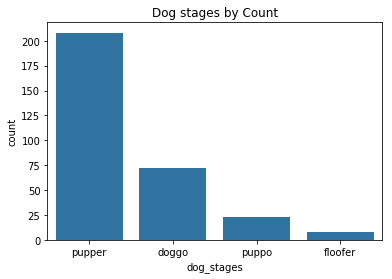

In [46]:
# showing the dog_category by count
base_color = sns.color_palette()[0]
ordered = df.dog_stages.value_counts().index

sns.countplot(data=df, x='dog_stages', color=base_color, order=ordered)
plt.title('Dog stages by Count');

Overall, Pupper happens to be the most tweeted dog on WeRateDogs while Floofer is the least.

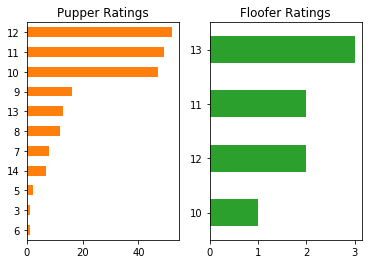

In [47]:
# Comparing the most tweeted dogs to the least by ratings
pupperdf = df[df['dog_stages']=='pupper']
flooferdf = df[df['dog_stages']=='floofer']

# Plotting Pupper Ratings
plt.subplot(1,2,1)
pupperdf['rating_numerator'].value_counts().sort_values(ascending=True).plot.barh(
    color=sns.color_palette()[1])
plt.title('Pupper Ratings')

# Plotting Floofer Ratings
plt.subplot(1,2,2)
flooferdf['rating_numerator'].value_counts().sort_values(ascending=True).plot.barh(
    color=sns.color_palette()[2])
plt.title('Floofer Ratings');

Most of Pupper dogs are rated above 9 with the highest rating being 14 and the least being 3.

For Floofer, there are just 4 unique ratings from 10 to 13 with 13 having the most counts.

######  Pupper

Hi, I am Pupper.


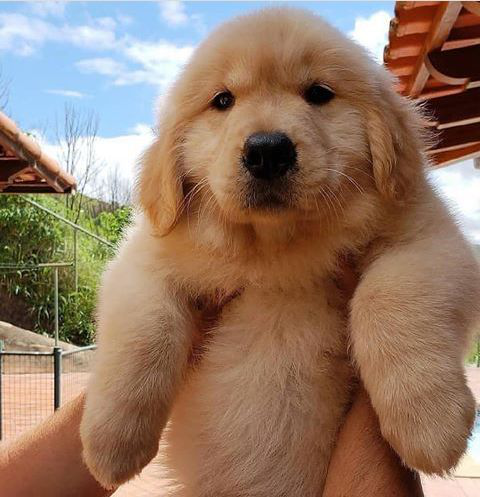

In [48]:
# Displaying Pupper Image
print('\033[1m'+'Hi, I am Pupper.'+'\033[0m')
url = 'https://i.pinimg.com/564x/a7/35/10/a735109e2cac6678373a3ed958c3d11e.jpg'
r=requests.get(url)
Image.open(BytesIO(r.content))

######  Floofer

Hey, I am Floofer.


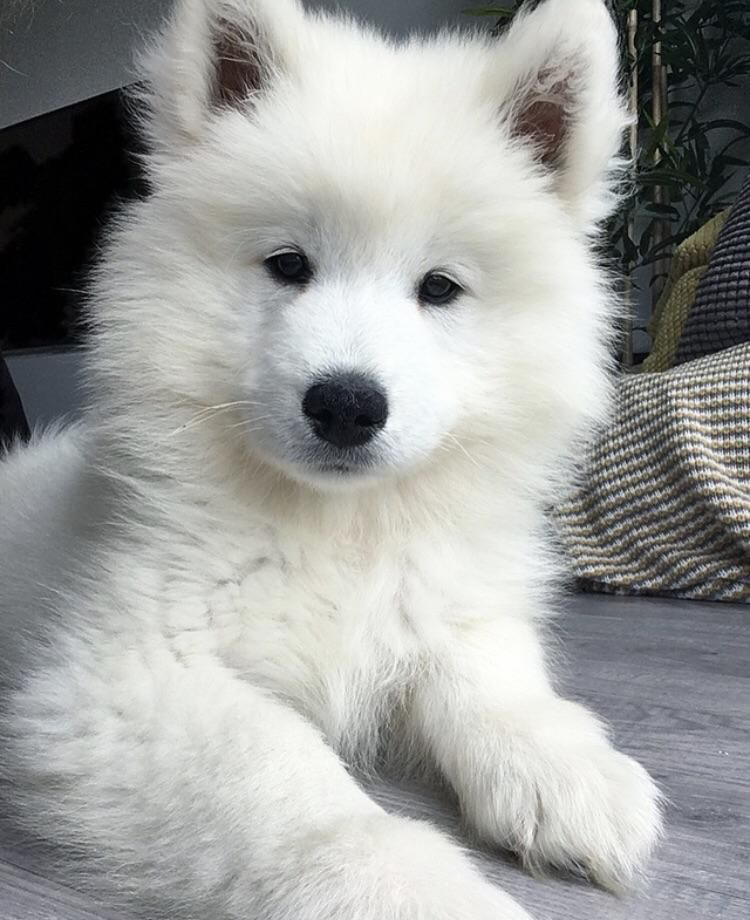

In [49]:
# Displaying Floofer Image
print('\033[1m'+'Hey, I am Floofer.'+'\033[0m')
url = 'https://i.pinimg.com/originals/d1/4e/19/d14e1944a24a48a875cfc8069c0d4bd9.jpg'
r=requests.get(url)
Image.open(BytesIO(r.content))

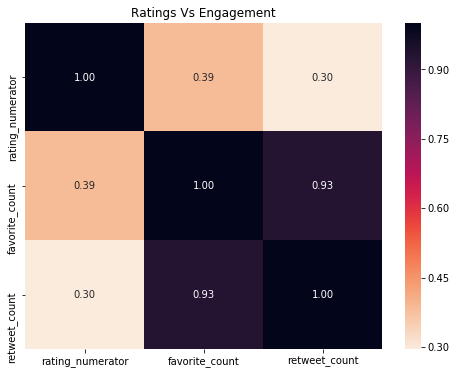

In [50]:
# Looking for any relationship between ratings and people's engagement on the tweet
RatVsEng = df[['rating_numerator','favorite_count', 'retweet_count']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(RatVsEng, annot=True, fmt='.2f', cmap='rocket_r')
plt.title('Ratings Vs Engagement');

There is almost a perfect correlation (0.93) between favorite_count and retweet_count indicating that as tweeps retweet, they also like the tweets on WeRateDogs.

However, there is a weak relationship between ratings and people's engagement (0.39 for favorite_count and 0.30 for retweet_count). This means that a tweet having higher rating doesn't translate to having higher retweets or likes.

### Insights
##### In general:
1. On average, the rating numerator is around 11 while the denominator is 10

2. Also, people usually have a dog image per tweet

3. Per post, every WeDogRate tweet receive at least 8,000 likes.

4. Under dog category, Pupper happens to be the most tweeted dog on WeRateDogs while Floofer is the least.

5. Most of Pupper dogs are rated above 9 with the highest rating being 14 and the least being 3.

6. For Floofer, there are just 4 unique ratings from 10 to 13 with 13 having the most counts.

7. There is almost a perfect correlation (0.93) between favorite_count and retweet_count indicating that as tweeps retweet, they also like the tweets on WeRateDogs.

8. However, there is a weak relationship between ratings and people's engagement (0.39 for favorite_count and 0.30 for retweet_count). This means that a tweet having higher rating doesn't translate to having higher retweets or likes.